# 🎬 Movie Recommendation System (Content-Based)

Welcome to this project on building a **Content-Based Movie Recommendation System** using IMDb datasets.

In this notebook, we will walk through the entire process of developing a recommendation engine that suggests movies to users based on their preferences and the content features of movies such as genres, cast, keywords, and more.

### 📌 Objective:
To build a recommendation system that recommends movies similar to a given movie using only the content/features of the movies.

### 🔧 Techniques Used:
- Content-Based Filtering
- Natural Language Processing (TF-IDF, Cosine Similarity)
- Data Cleaning and Feature Engineering


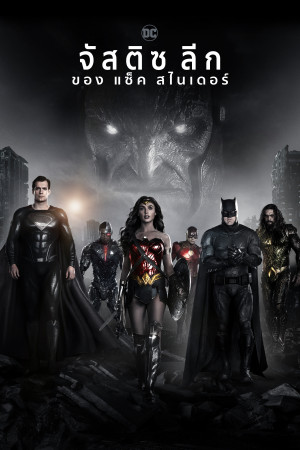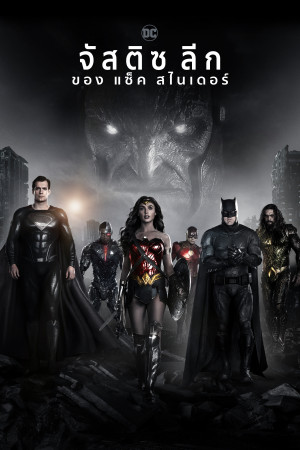

## 📥 Step 1: Importing the Data

We begin by importing the necessary datasets from IMDb. This may include:
- Movie metadata (title, overview, genres, cast, crew, etc.)
- Keywords and tags associated with each movie

We also import the necessary libraries for data manipulation and analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from collections import Counter
import ast
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

In [2]:
df1=pd.read_csv(r"C:\Users\omar_\Downloads\tmdb_5000_credits.csv\tmdb_5000_credits.csv")
df2=pd.read_csv(r"C:\Users\omar_\Downloads\tmdb_5000_movies.csv\tmdb_5000_movies.csv")

## 🧹 Step 2: Data Preprocessing and Cleaning

Before building our model, we need to prepare the data:
- Handle missing values
- Merge relevant datasets if needed
- Convert data into suitable formats (e.g., list of genres or keywords)
- Extract or engineer useful features such as a combined text representation of each movie

This step is crucial to ensure our recommendation engine has meaningful input to work with.


In [3]:
print(df1.shape)
print(df2.shape)

(4803, 4)
(4803, 20)


In [4]:
df1.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [5]:
print(df1.dtypes)
print("_____________________________________________________________")
print(df2.dtypes)

movie_id     int64
title       object
cast        object
crew        object
dtype: object
_____________________________________________________________
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object


In [6]:
print(df1.info())
print("_____________________________________________________________")
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
None
_____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 

In [7]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [8]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

## 📊 Step 3: Exploratory Data Analysis

In this section, we explore key features of the merged dataset to gain insights into the structure and content of the data. This will help inform the way we engineer features for the recommendation model.

We'll cover:
- 🎭 Most common genres
- 📅 Movie distribution over years
- 🎬 Most frequent actors
- 🗝️ Most common keywords


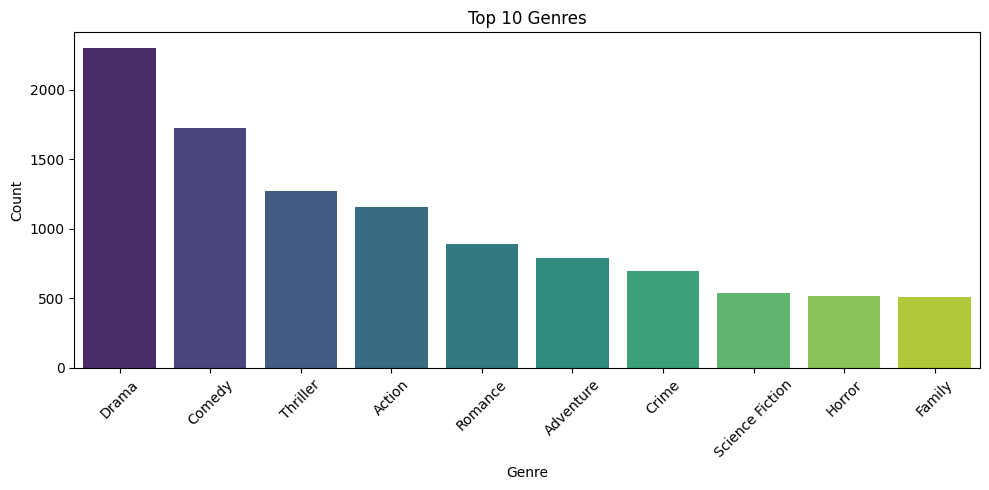

In [10]:

df2['genres'] = df2['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df2['genres'] = df2['genres'].apply(lambda genre_list: [genre['name'] for genre in genre_list if isinstance(genre, dict) and 'name' in genre])
all_genres = sum(df2['genres'], [])
genre_counts = Counter(all_genres).most_common(10)

if genre_counts:
    genres_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])
    plt.figure(figsize=(10, 5))
    sns.barplot(data=genres_df, x='Genre', y='Count', hue='Genre', palette='viridis', legend=False)
    plt.title('Top 10 Genres')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No genre data found.")

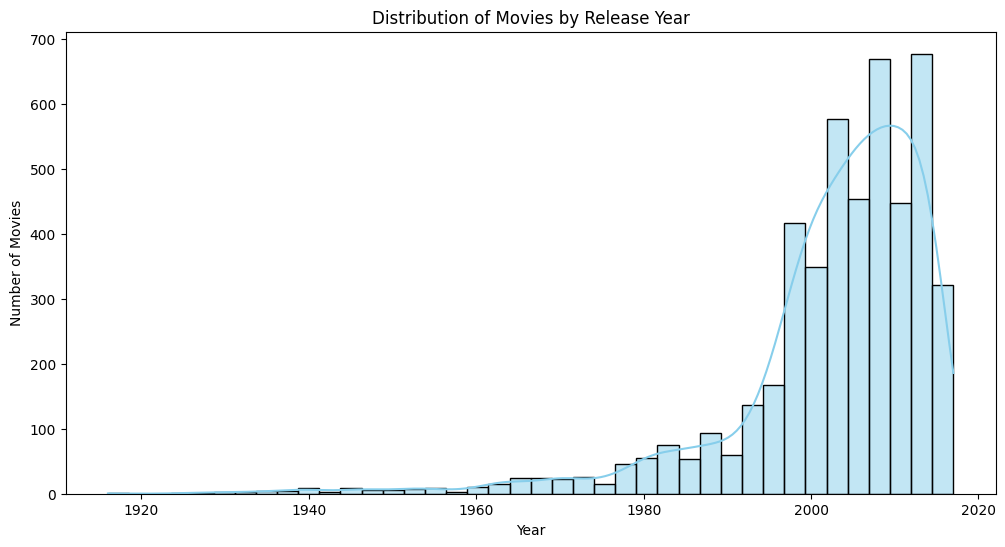

In [11]:

df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')
df2['release_year'] = df2['release_date'].dt.year

# Plot
plt.figure(figsize=(12,6))
sns.histplot(df2['release_year'].dropna(), bins=40, kde=True, color='skyblue')
plt.title("Distribution of Movies by Release Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

## 🧠 Step 4: Building the Content-Based Recommendation Model

We will now build the recommendation model by:

1. Creating a 'soup' of content features (genres, keywords, cast, etc.)
2. Converting the text data into numerical vectors using **TF-IDF Vectorization**
3. Calculating similarity scores between movies using **Cosine Similarity**

Once the similarity matrix is created, we can retrieve and recommend the top N similar movies for any given input movie.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english')


df2['overview'] = df2['overview'].fillna('')


tfidf_matrix = tfidf.fit_transform(df2['overview'])


tfidf_matrix.shape

(4803, 20978)

In [13]:
from sklearn.metrics.pairwise import linear_kernel


cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [14]:

indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [15]:
def get_recommendations(title, cosine_sim=cosine_sim):
    
    idx = indices[title]

    
    sim_scores = list(enumerate(cosine_sim[idx]))

    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    
    sim_scores = sim_scores[1:11]

    
    movie_indices = [i[0] for i in sim_scores]

    
    return df2['title'].iloc[movie_indices]

## ✅ Step 5: Testing the Recommendation Engine

We test our model by passing a few sample movie titles and examining the recommended results.

This helps us validate whether the recommendations make sense and whether the content features are driving meaningful suggestions.


In [16]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [17]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

## 📌 Conclusion and Future Work

### ✅ Summary:
- We built a content-based movie recommender using IMDb data.
- The model analyzes the textual features of movies to recommend similar titles.

### 🚀 Future Improvements:
- Include more metadata (e.g., director, production companies)
- Combine with collaborative filtering for a hybrid model
- Improve text preprocessing using advanced NLP techniques

Thank you for reading!
